In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We'll continue to make use of the fuel economy dataset in this workspace.

In [20]:
# read in dataframe
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task**: Use a plot to explore whether or not there differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) **Note**: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

In [21]:
# limit dataframe to just regular and premium gasoline
fuel_econ = fuel_econ[fuel_econ['fuelType'].isin(['Regular Gasoline', 'Premium Gasoline'])]
# confirm change
fuel_econ.fuelType.value_counts()

Premium Gasoline    2302
Regular Gasoline    1521
Name: fuelType, dtype: int64

In [24]:
# creating list of vehicle size categories
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
# creating an ordered list of categorical types for vehicle sizes
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
# converting VClass column from an object type to an ordered categorical type
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

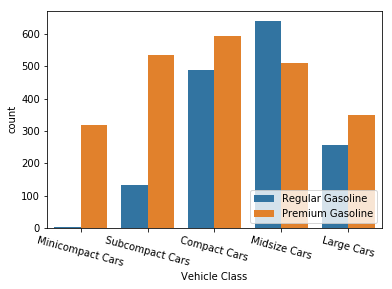

In [44]:
# clustered bar chart of vehicle class and fuel type by counts
# needed to take out the other types of fuel to reduce clutter
# also converted vehicle size to a ordered categorical type variable, 
# though i think I could've also used x_order as an argument?
# many different order arguments, just make sure it's a variable that's already been stated in an argument
ax = sns.countplot(data = fuel_econ,
                   x = 'VClass',
                   hue = 'fuelType',
                   hue_order = ['Regular Gasoline', 'Premium Gasoline']);
plt.xticks(rotation = -15)
# note that 0.8 is the default for framealpha (transparency of legend)
ax.legend(loc= 4, framealpha = 0.8);
plt.xlabel('Vehicle Class');

In [59]:
# gives back panda series of counts for VClass and fuelType
ct_counts = fuel_econ.groupby(['VClass', 'fuelType']).size()
# turns the panda series into a dataframe
ct_counts = ct_counts.reset_index(name = 'count')
# pivots this so columsn are VClass and rows are fuelType and cells have counts
ct_counts = ct_counts.pivot(index = 'fuelType', columns = 'VClass', values = 'count')
# confirm
ct_counts

VClass,Minicompact Cars,Subcompact Cars,Compact Cars,Midsize Cars,Large Cars
fuelType,,,,,
Premium Gasoline,318,534,593,509,348
Regular Gasoline,3,132,490,640,256


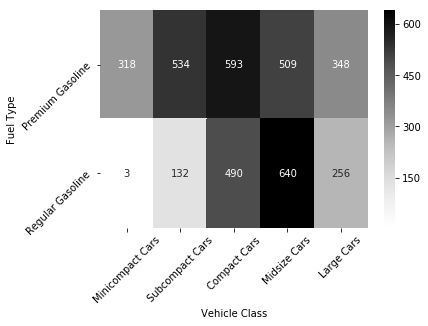

In [75]:
# heatmap of vehicle class and fuel type by counts
# with annotations, integer count annotations, grey colormap, rotated axes ticks, and axes labels
sns.heatmap(ct_counts,
            annot = True,
            fmt = 'd',
           cmap = 'Greys');
plt.xticks(rotation = 45);
plt.yticks(rotation = 45);
plt.xlabel('Vehicle Class');
plt.ylabel('Fuel Type');